In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283838 sha256=06fb4e17788c769c611d2b69c2966c310a1e5a5ced1080947c5b7c186fa0c423
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lime.lime_tabular import LimeTabularExplainer

# Load the PIMA Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=columns)

# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode="classification")

# Choose a random instance for interpretation
sample_idx = np.random.randint(0, len(X_test))
sample = X_test.iloc[sample_idx]
true_class = y_test.iloc[sample_idx]

# Explain the instance using LIME
explanation = explainer.explain_instance(sample.values, clf.predict_proba)

# Display the explanation
explanation.show_in_notebook()


Random Forest Accuracy: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/154 [00:00<?, ?it/s]

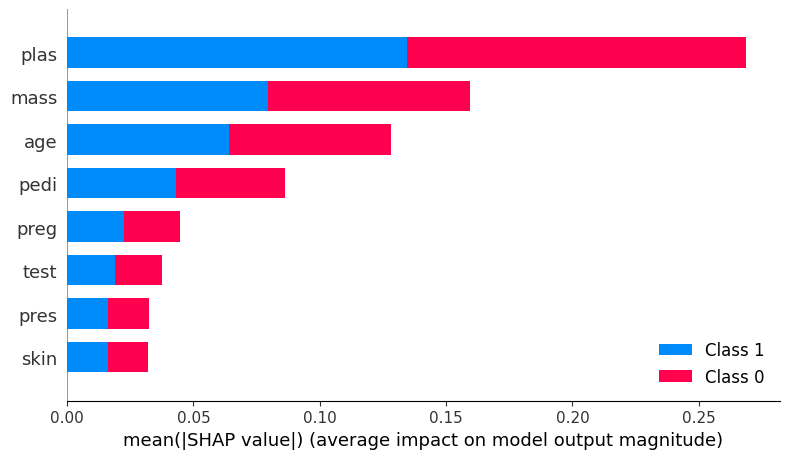

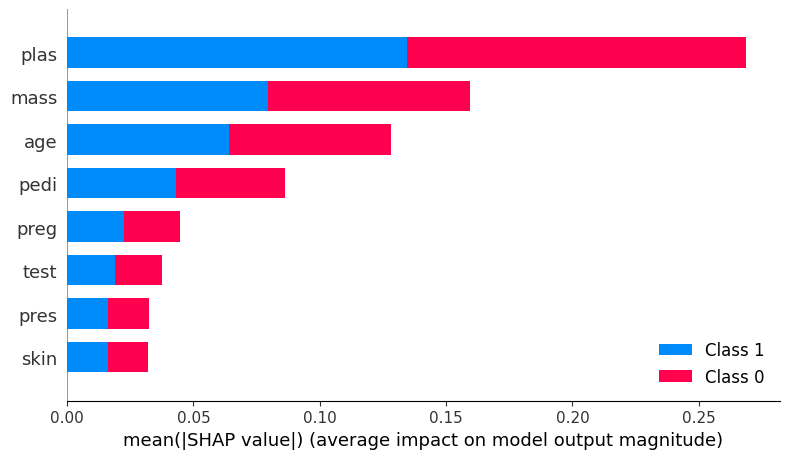

TypeError: ignored

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the PIMA Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=columns)

# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier (replace this with your model training code)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.KernelExplainer(model.predict_proba,X_train)

# Calculate SHAP values for the entire test dataset
shap_values = explainer.shap_values(X_test)

# Create different types of SHAP plots for global interpretability
shap.summary_plot(shap_values, X_test, plot_type="bar")  # Summary plot
shap.summary_plot(shap_values, X_test)  # Summary plot without bar plot
shap.dependence_plot("age", shap_values, X_test)  # Dependence plot

# Force plot for a single instance (replace index with desired instance)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

# Interaction plot between two features
shap.interaction_plot("age", "bmi", shap_values, X_test)

# Waterfall plot for a single instance (replace index with desired instance)
shap.plots.waterfall(shap_values[0])

# Bee swarm plot to show distribution of SHAP values
shap.plots.beeswarm(shap_values)

# Kernel density plot for a single feature
shap.plots.kde(shap_values[:, "glucose"])

# Summary dot plot
shap.plots.scatter(shap_values, max_display=10)

# Summary dot plot with color representing feature values
shap.plots.scatter(shap_values, feature_names=X_test.columns, max_display=10)

# Summary bar plot
shap.plots.bar(shap_values, max_display=10)

# Summary violin plot
shap.plots.violin(shap_values, max_display=10)

# Summary compact dot plot
shap.plots.dot(shap_values, max_display=10)

# Summary heatmap plot
shap.plots.heatmap(shap_values, max_display=10)

# Summary beeswarm plot
shap.plots.beeswarm(shap_values, max_display=10)

# Summary layered violin plot
shap.plots.layered_violin(shap_values, max_display=10)

# Summary stacked violin plot
shap.plots.stacked_violin(shap_values, max_display=10)

# Summary waterfall plot
shap.plots.waterfall(shap_values)

# Summary correlation plot
shap.plots.correlation_plot(shap_values)

# Summary joint plot
shap.plots.joint_plot("glucose", shap_values, X_test)

# Summary stacked dot plot
shap.plots.stacked_dot(shap_values, max_display=10)

# Summary bee swarm plot with color representing feature values
shap.plots.beeswarm(shap_values, feature_names=X_test.columns, max_display=10)

# Summary ridge plot
shap.plots.ridge(shap_values)

# Summary decision plot
shap.plots.decision_plot(explainer.expected_value, shap_values)

# Summary multi-output decision plot
shap.plots.multioutput_decision(explainer.expected_value, shap_values)

# Summary rank plot
shap.plots.rank(shap_values)

# Summary waterfall plot with interaction effect
shap.plots.waterfall(shap_values[0], interaction_index="age")

# Summary grouped dot plot
shap.plots.grouped_dot(shap_values, max_display=10)

# Summary grouped violin plot
shap.plots.grouped_violin(shap_values, max_display=10)

# Summary dot plot with bar highlighting
shap.plots.dot(shap_values, highlight=0)

# Summary grouped bar plot
shap.plots.grouped_bar(shap_values)

# Summary beeswarm plot with interaction effect
shap.plots.beeswarm(shap_values, interaction_index="age")

# Summary grouped violin plot with interaction effect
shap.plots.grouped_violin(shap_values, interaction_index="age")

# Summary box plot
shap.plots.box(shap_values)

# Summary layered violin plot with interaction effect
shap.plots.layered_violin(shap_values, interaction_index="age")

# Summary dependence plot with interaction effect
shap.plots.dependence_plot("age", shap_values)


In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the PIMA Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=columns)

# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier (replace this with your model training code)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# %% Create SHAP explainer
explainer = shap.TreeExplainer(model)
# Calculate shapley values for test data
start_index = 4
end_index = 5
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]


preg  plas  pres  skin  test  mass  pedi  age
473     7   136    90     0     0  29.9  0.21   50

In [ ]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(1, 8)


[array([[-0.02691404, -0.01538947,  0.05722577,  0.00466151,  0.01329687,
         -0.01755156,  0.05266405, -0.11261853]]),
 array([[ 0.02691404,  0.01538947, -0.05722577, -0.00466151, -0.01329687,
          0.01755156, -0.05266405,  0.11261853]])]

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

The RF predicted: 0


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.waterfall_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

The RF predicted: 0


TypeError: ignored

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.show()

In [ ]:
df1 = pd.read_csv("/content/diabetic_disease.csv")
df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     85.0           66.0           29.0    102.5  26.6   
1          1.0     89.0           66.0           23.0     94.0  28.1   
2          5.0    116.0           74.0           27.0    102.5  25.6   
3         10.0    115.0           70.0           27.0    102.5  35.3   
4          4.0    110.0           92.0           27.0    102.5  37.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.351   31        0  
1                     0.167   21        0  
2                     0.201   30        0  
3                     0.134   29        0  
4                     0.191   30        0

In [ ]:
!pip install shap

In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
df1.drop('Pregnancies',inplace=True, axis=1)
df1.drop('BloodPressure',inplace=True, axis=1)
df1.drop('SkinThickness',inplace=True, axis=1)
df1.drop('DiabetesPedigreeFunction',inplace=True, axis=1)

In [ ]:
X = df1.iloc[:,:-1]
Y = df1.iloc[:,-1]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,stratify=Y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Train a Random Forest classifier (replace this with your model training code)
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
print("training accuracy:",model.score(xtrain,ytrain)) #training accuracy
print("test accuracy:",model.score(xtest,ytest)) # test accuracy

training accuracy: 1.0
test accuracy: 0.8831168831168831


In [ ]:
# Provide Probability as Output
def m_churn_proba(x):
   return model.predict_proba(x)[:,1]
# Provide Log Odds as Output
def model_churn_log_odds(x):
   p = model.predict_log_proba(x)
   return p[:,1] - p[:,0]

In [ ]:
# SHAP values computation
background_c = shap.maskers.Independent(X, max_samples=1000) ## Concealed features may be hidden by using this function.
explainer = shap.Explainer(model, background_c,feature_names=list(X.columns))
shap_values_c = explainer(X)
shap_values = pd.DataFrame(shap_values_c.values)
shap_values.columns = list(X.columns)
shap_values

100%|===================| 1532/1536 [01:20<00:00]       

ExplainerError: ignored

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


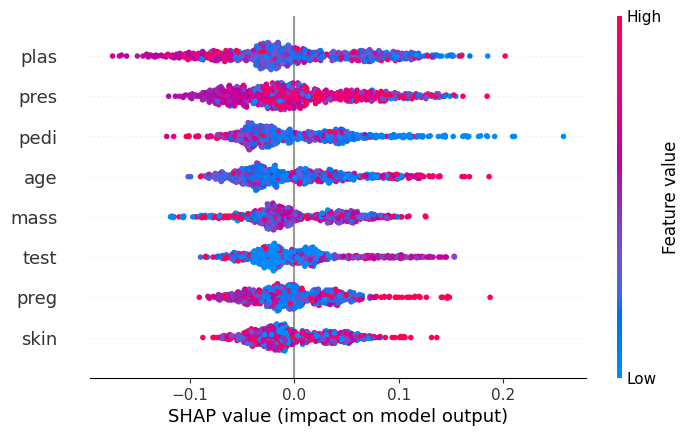

In [ ]:
from shap import Explainer
from shap.plots import beeswarm
beeswarm(shap_values[:,:,1])

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(xtrain)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


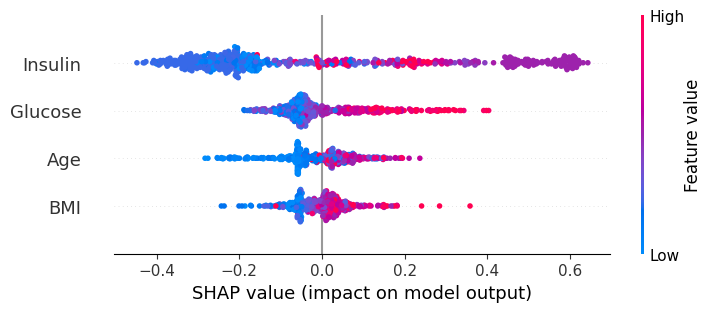

In [ ]:
from shap import Explainer
from shap.plots import beeswarm
beeswarm(shap_values[:,:,1])

In [ ]:
X.iloc[400]

Glucose    105.0
Insulin    102.5
BMI         32.5
Age         26.0
Name: 400, dtype: float64

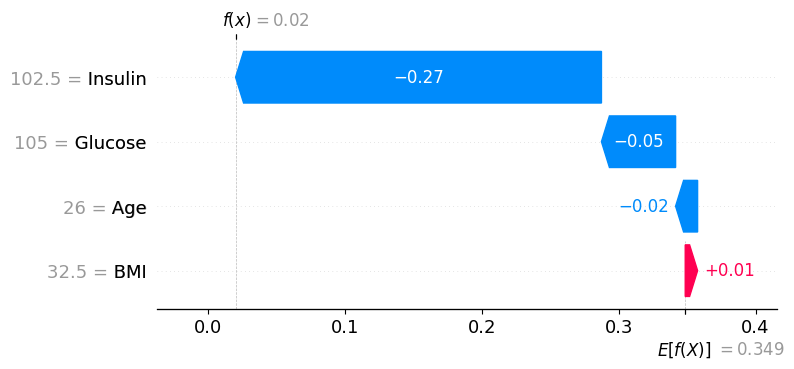

In [ ]:
from shap import Explainer, Explanation
from shap import waterfall_plot
explainer = Explainer(model)
sv = explainer(X)

exp = Explanation(sv[:,:,1], sv.base_values[:,1], X, feature_names=X.columns)
idx = 400 # datapoint to explain
waterfall_plot(exp[idx])

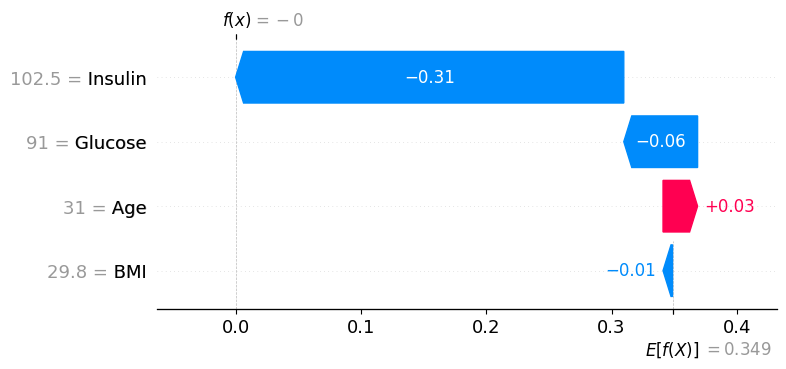

In [ ]:
from shap import Explainer, Explanation
from shap import waterfall_plot
explainer = Explainer(model)
sv = explainer(xtrain)

exp = Explanation(sv[:,:,1], sv.base_values[:,1], xtrain, feature_names=X.columns)
idx = 400 # datapoint to explain
waterfall_plot(exp[idx])

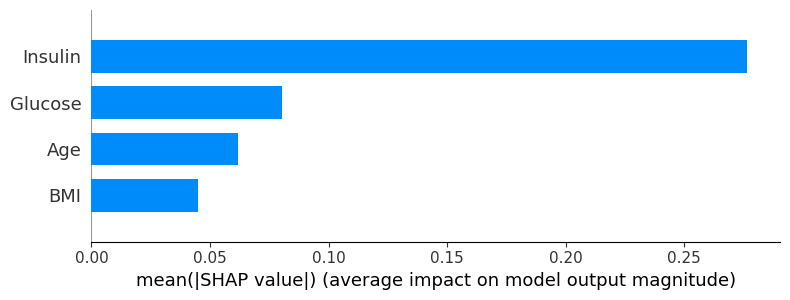

In [ ]:
# Create a SHAP explainer object
explainer = shap.Explainer(model, xtrain)
from shap import summary_plot
from shap import Explainer, Explanation
import shap




# Create a global bar plot with SHAP values on each bar
summary_plot(exp, xtest, feature_names=X.columns, plot_type="bar", show=True)
plt.show()

In [ ]:
!pip install --upgrade shap

In [ ]:
# compute SHAP values
model = model.fit(X,Y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

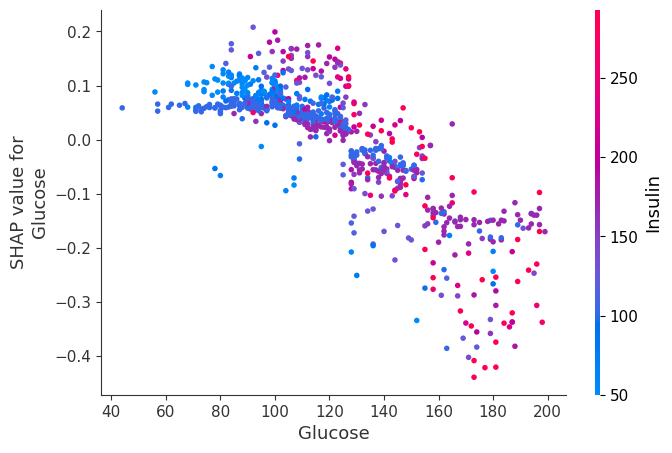

In [ ]:
# We can pass a feature name instead of an index
shap.dependence_plot("rank(1)", shap_values[0], X)

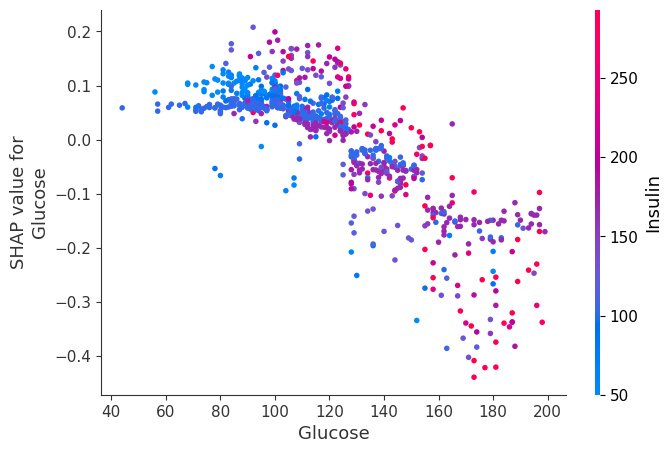

In [ ]:
shap.dependence_plot("Glucose", shap_values[0], X)

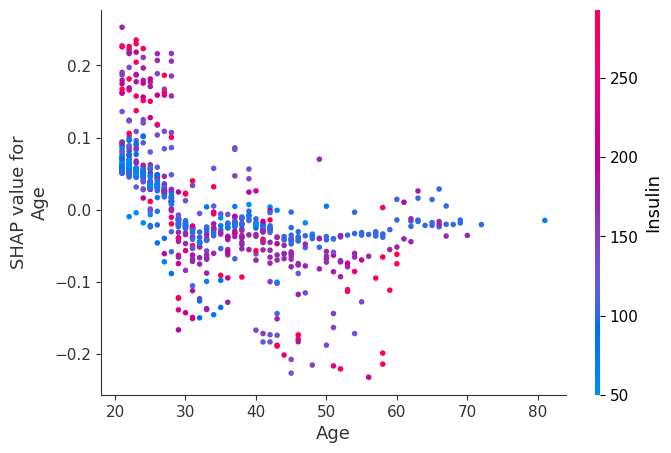

In [ ]:
shap.dependence_plot("Age", shap_values[0], X)

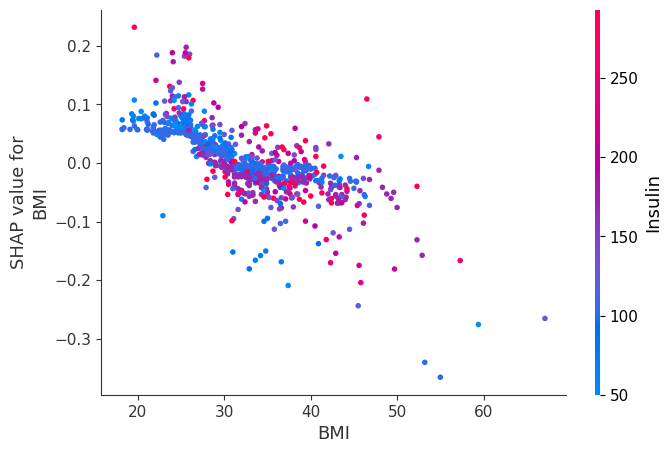

In [ ]:
shap.dependence_plot("BMI", shap_values[0], X)

In [ ]:
X.shape

(768, 4)

In [ ]:

import shap

# train XGBoost model

model1 =RandomForestClassifier(n_estimators=100, random_state=42).fit(X,Y)

# compute SHAP values
explainer = shap.Explainer(model1,X)
shap_values = explainer(X,check_additivity=False)

 96%|=================== | 1476/1536 [00:12<00:00]       

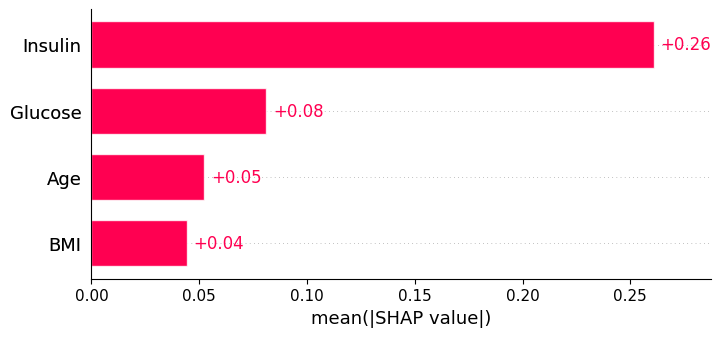

In [ ]:
shap_values
exp = Explanation(shap_values[:,:,1], shap_values.base_values[:,1], X, feature_names=X.columns)
shap.plots.bar(exp)

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already calculated the SHAP values 'shap_values' and have a DataFrame 'X' with feature names

# Find the maximum SHAP value for each instance
max_shap_values = np.max(np.abs(shap_values[:,:,1]), axis=1)

# Create an Explanation object
exp = shap.Explanation(shap_values[:,:,1], shap_values.base_values[:,1], X)

# Create a bar plot of the maximum SHAP values
shap.plots.bar(exp, max_display=len(X.columns))
plt.title('Bar Plot of Maximum SHAP Values')
plt.show()


ValueError: ignored

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


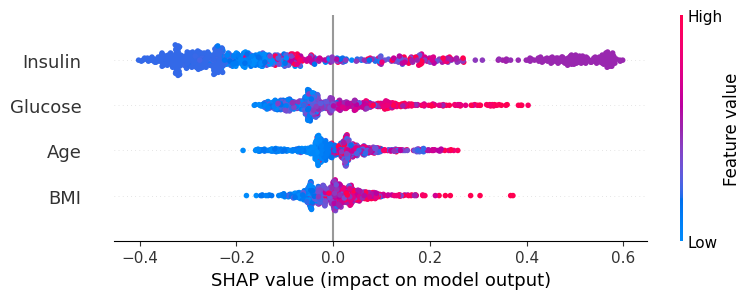

In [ ]:
shap.summary_plot(exp)

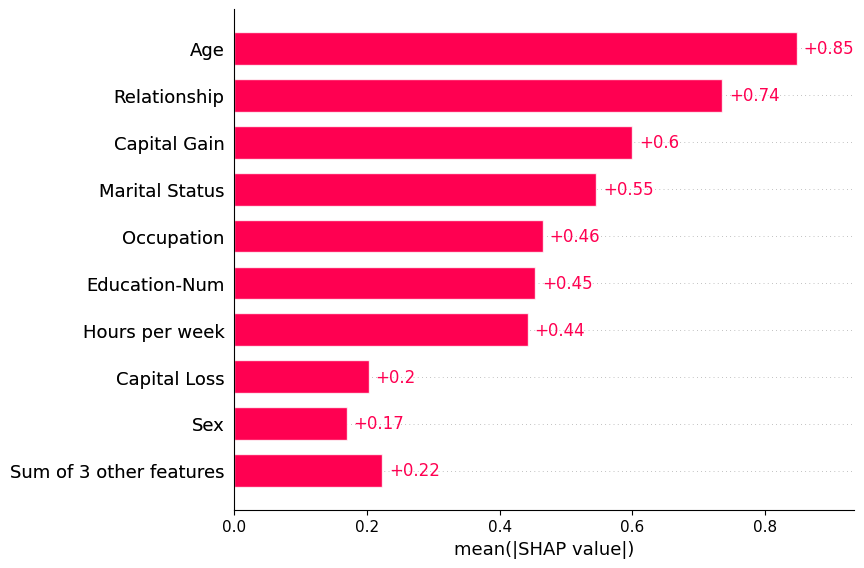

In [ ]:
shap.plots.bar(shap_values)


In [ ]:
# PDP
sample_ind = 25
fig,ax = shap.partial_dependence_plot(
"BMI", m_churn_proba, X, model_expected_value=True,
feature_expected_value=True, show=False, ice=False)

ValueError: ignored

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X)


In [ ]:
shap_values

.values =
array([[[ 0.01524994, -0.01524994],
        [ 0.07396146, -0.07396146],
        [ 0.06952701, -0.06952701],
        ...,
        [ 0.00399912, -0.00399912],
        [ 0.04173762, -0.04173762],
        [-0.09071748,  0.09071748]],

       [[-0.00374941,  0.00374941],
        [ 0.02519285, -0.02519285],
        [ 0.09984521, -0.09984521],
        ...,
        [ 0.03618579, -0.03618579],
        [ 0.02606106, -0.02606106],
        [ 0.02781803, -0.02781803]],

       [[ 0.03141937, -0.03141937],
        [ 0.0449822 , -0.0449822 ],
        [ 0.02289698, -0.02289698],
        ...,
        [-0.02877021,  0.02877021],
        [ 0.03764237, -0.03764237],
        [ 0.03042491, -0.03042491]],

       ...,

       [[-0.00590536,  0.00590536],
        [-0.11271691,  0.11271691],
        [-0.0037245 ,  0.0037245 ],
        ...,
        [-0.05148768,  0.05148768],
        [-0.07197827,  0.07197827],
        [ 0.01323114, -0.01323114]],

       [[-0.06209795,  0.06209795],
        [-0.08726

In [ ]:
shap.initjs()
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

In [ ]:
# Waterfall plot
sample_feature_importance(0, 'waterfall')

ValueError: ignored

In [ ]:
!pip install LIME

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for LIME: filename=lime-0.2.0.1-py3-none-any.whl size=283838 sha256=64ff15c2dbc81d26596d549dfa42a7d283ca165937da9f83cf246c1d2b42977b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built LIME


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# Create a LIME explainer
explainer = LimeTabularExplainer(X.values, mode="classification",feature_names=X.columns)

# Choose a random instance for interpretation
sample_idx = 400
sample = X.iloc[sample_idx]
true_class = Y.iloc[sample_idx]

# Explain the instance using LIME
explanation = explainer.explain_instance(sample.values, model.predict_proba)

# Display the explanation
explanation.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
